In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's import the entire data

In [2]:
import os

In [5]:
#The os. listdir() method returns a list of the names of the entries in a directory.
files=os.listdir(r"C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr")

In [18]:
files

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv',
 'ABT_data.csv',
 'ACN_data.csv',
 'ADBE_data.csv',
 'ADI_data.csv',
 'ADM_data.csv',
 'ADP_data.csv',
 'ADSK_data.csv',
 'ADS_data.csv',
 'AEE_data.csv',
 'AEP_data.csv',
 'AES_data.csv',
 'AET_data.csv',
 'AFL_data.csv',
 'AGN_data.csv',
 'AIG_data.csv',
 'AIV_data.csv',
 'AIZ_data.csv',
 'AJG_data.csv',
 'AKAM_data.csv',
 'ALB_data.csv',
 'ALGN_data.csv',
 'ALK_data.csv',
 'ALLE_data.csv',
 'ALL_data.csv',
 'ALXN_data.csv',
 'AMAT_data.csv',
 'AMD_data.csv',
 'AME_data.csv',
 'AMGN_data.csv',
 'AMG_data.csv',
 'AMP_data.csv',
 'AMT_data.csv',
 'AMZN_data.csv',
 'ANDV_data.csv',
 'ANSS_data.csv',
 'ANTM_data.csv',
 'AON_data.csv',
 'AOS_data.csv',
 'APA_data.csv',
 'APC_data.csv',
 'APD_data.csv',
 'APH_data.csv',
 'APTV_data.csv',
 'ARE_data.csv',
 'ARNC_data.csv',
 'ATVI_data.csv',
 'AVB_data.csv',
 'AVGO_data.csv',
 'AVY_data.csv',
 'AWK_data.csv',
 'AXP_data.csv',
 'AYI_data.csv',
 'AZO_data.cs

In [11]:
import warnings

In [12]:
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
stocks=pd.DataFrame()
path=r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr'
for file in files:
    current_stocks=pd.read_csv(path+'/'+file,encoding='ISO-8859-1',error_bad_lines=False)
    stocks=pd.concat([stocks,current_stocks])

In [20]:
# We have imported the stock data of all companies but we want to analyse the stock data of some particular compaines namely Apple,Google,Amazon and Microsoft so lets make a separate dataframe for those compaines

In [25]:
top_4_compaines=[
    'AAPL_data.csv',
    'AMZN_data.csv',
    'GOOGL_data.csv',
    'MSFT_data.csv'
]

In [30]:
top_4_compaines_stock=pd.DataFrame()
path=r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr'
for file in top_4_compaines:
    stocks=pd.read_csv(path+'/'+file,encoding='ISO-8859-1',error_bad_lines=False)
    top_4_compaines_stock=pd.concat([top_4_compaines_stock,stocks])

In [81]:
top_4_compaines_stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [32]:
top_4_compaines_stock.shape

(5036, 7)

## Analyzing the change in price of stock overtime

### Cleaning the data

In [33]:
top_4_compaines_stock.isnull().any()

date      False
open      False
high      False
low       False
close     False
volume    False
Name      False
dtype: bool

In [34]:
top_4_compaines_stock.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [36]:
top_4_compaines_stock['date']=pd.to_datetime(top_4_compaines_stock['date'])

In [37]:
top_4_compaines_stock.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [ ]:
#lets now plot a graph to see the change in price of stock overtime (for this we will use the closing price)

In [67]:
list_of_companies=top_4_compaines_stock['Name'].unique()

In [66]:
for i,name in enumerate(top_4_compaines_stock['Name'].unique()):
    print(i,name)

0 AAPL
1 AMZN
2 GOOGL
3 MSFT


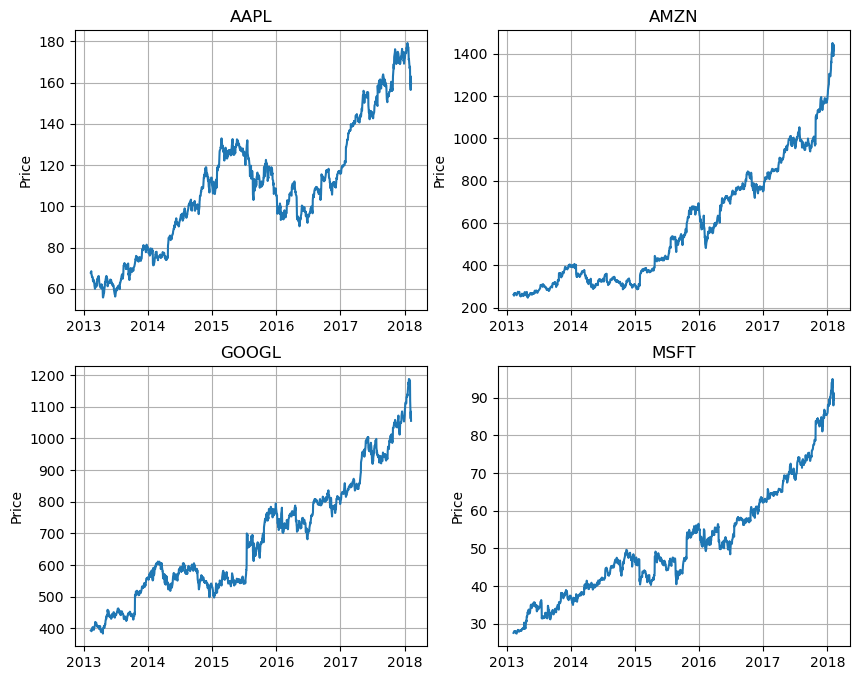

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, company in enumerate(list_of_companies):
    company_data =top_4_compaines_stock[top_4_compaines_stock['Name'] == company].reset_index(drop=True)
    ax_i = ax[i // 2, i % 2]  # Get the correct subplot axes
    ax_i.plot(company_data['date'], company_data['close'])
    ax_i.set_title(f'{company}')
    ax_i.set_ylabel('Price')
    ax_i.grid(True)


## Moving average of various stocks 

In [78]:
#(unlike a normal average which considers an entire dataset , a rolling average takes a subset of the full dataset into consideration. It is not performed on an entire dataset but it is performed for a specified window or period of time)

##### In the rolling function we will give the timedelta in window parameter as we have a datetime datatype column the higher the value of window the lower the variation and so we get less noise so lets take value of 50 days

In [ ]:
top_4_compaines_stock['close_50'] = top_4_compaines_stock['close'].rolling(50).mean() 

In [92]:
top_4_compaines_stock.tail()

,date,open,high,low,close,volume,Name,close_30,close_50
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,86.9978,86.9978
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,87.1828,87.1828
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,87.2684,87.2684
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,87.4328,87.4328
1258,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,87.5598,87.5598


In [93]:
top_4_compaines_stock[top_4_compaines_stock['Name']=='AAPL']

,date,open,high,low,close,volume,Name,close_30,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,172.8252,172.8252
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,172.6356,172.6356
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,172.3026,172.3026
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,172.0640,172.0640


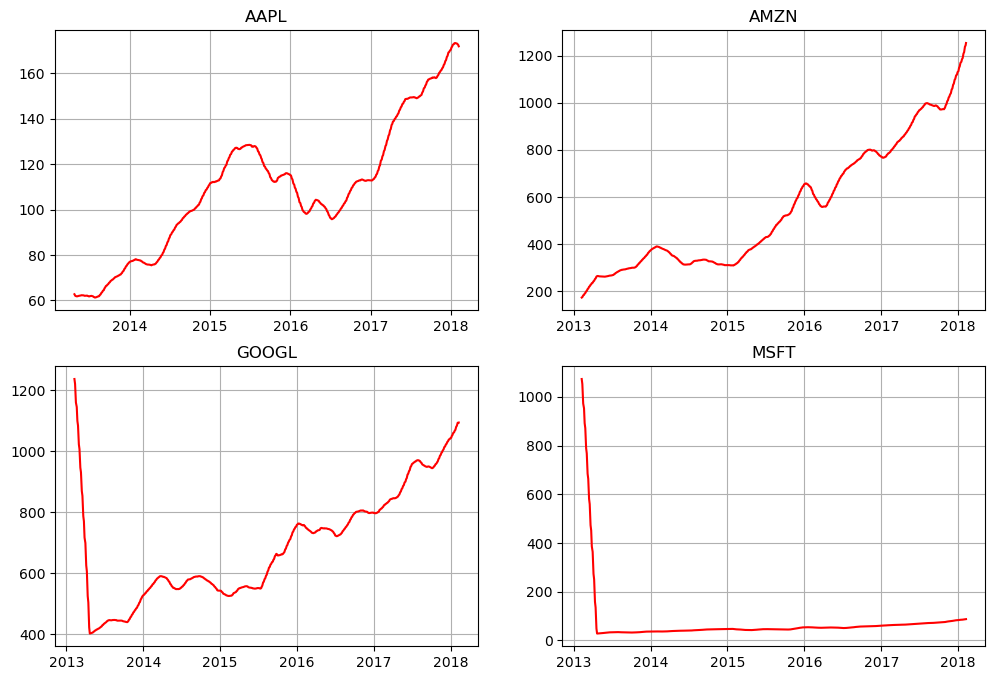

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, company in enumerate(list_of_companies):
    company_data =top_4_compaines_stock[top_4_compaines_stock['Name'] == company].reset_index(drop=True)
    ax_i = ax[i // 2, i % 2]  # Get the correct subplot axes
    ax_i.plot(company_data['date'], company_data['close_30'],color='Red')
    ax_i.set_title(f'{company}')
    ax_i.grid(True)

## Let's observe the closing price change in Apple Stock

In [104]:
# We need percentage change
## let's import the Apple data file
apple_data=pd.read_csv(r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr/AAPL_data.csv')

In [105]:
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [141]:
apple_data['Daily Price Change (in %)']=apple_data['close'].pct_change()*100

In [142]:
apple_data.head()

,date,open,high,low,close,volume,Name,Price Change (in %),Daily Price Change (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934,-0.089934


In [143]:
import plotly.express as px

In [144]:
px.line(apple_data,x='date',y='Daily Price Change (in %)')

##### From the above analysis we see the maximum positive price change was around 28 April 2014 which was 3.87% and maximum negative price change was around January 17 which was -2.45%

## Performing Resampling Analysis

In [115]:
apple_data.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Price Change (in %)    float64
dtype: object

In [116]:
apple_data['date']=pd.to_datetime(apple_data['date'])

In [117]:
apple_data.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
Price Change (in %)           float64
dtype: object

In [118]:
# One condition for resampling is that the dataframe should have a datetime index , so we create a new frame and set the index to datetime
apple_data_idx=apple_data.set_index('date')
apple_data_idx

,open,high,low,close,volume,Name,Price Change (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442


<Axes: xlabel='date'>

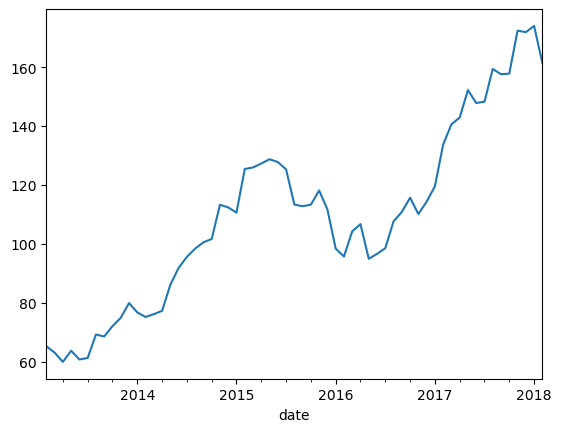

In [121]:
apple_data_idx['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

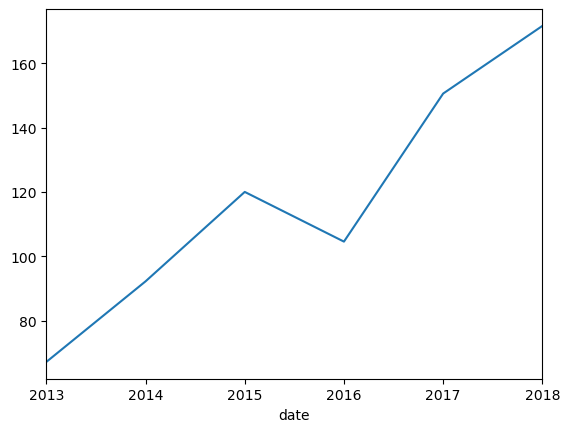

In [122]:
apple_data_idx['close'].resample('Y').mean().plot()

##### From the graph we see there was a linear progression after 2016 and Apple achieved its highest peak in 2018

## Correlation Analysis (Let's check if the closing prices of these compaines are correlated or not)

In [149]:
# for this firstly we need to create a dataframe of all the closing prices of all compaines
amazon_data=pd.read_csv(r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr/AMZN_data.csv')
google_data=pd.read_csv(r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr/GOOGL_data.csv')
microsoft_data=pd.read_csv(r'C:\Users\User\Documents\Stock Price Analysis\individual_stocks_5yr/MSFT_data.csv')

In [150]:
closing_prices=pd.concat([apple_data['close'],amazon_data['close'],google_data['close'],microsoft_data['close']],axis=1,keys=['Apple_close','Amazon_close','Google_close','Microsoft_close'])

In [151]:
closing_prices

,Apple_close,Amazon_close,Google_close,Microsoft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


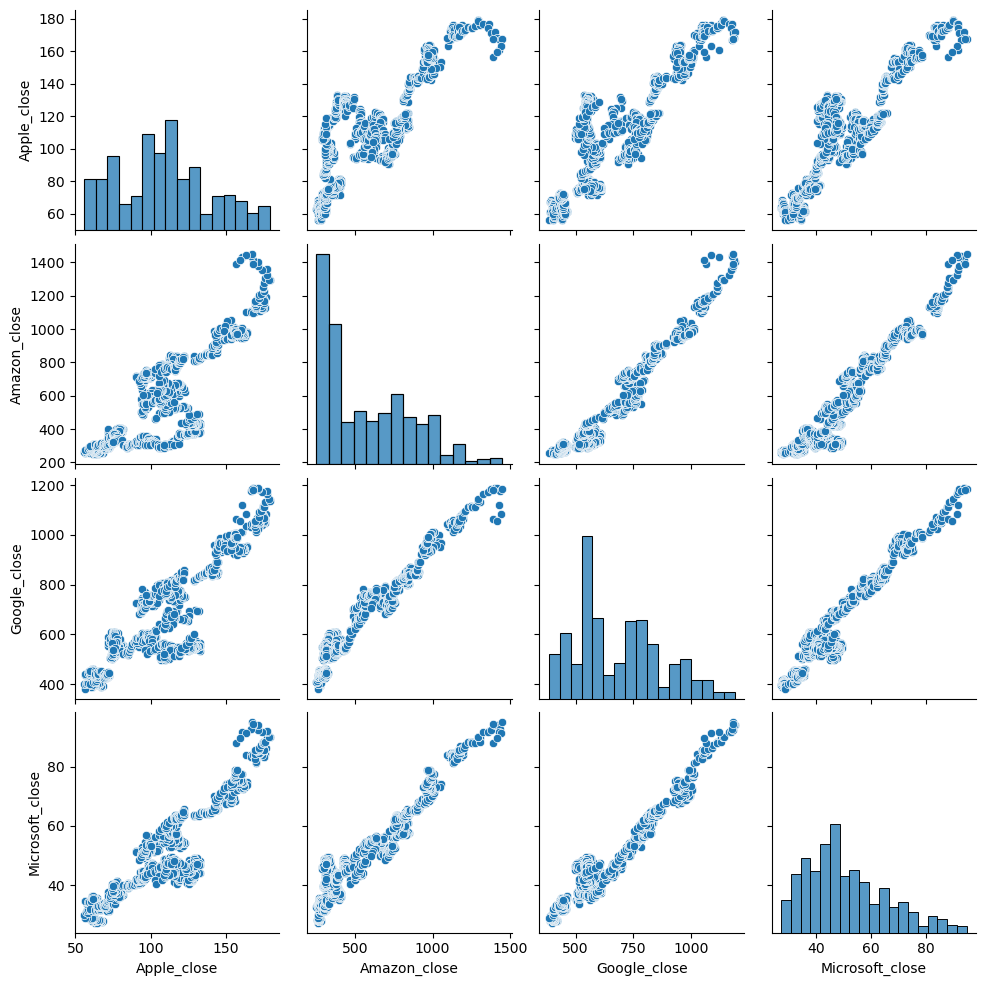

In [152]:
sns.pairplot(closing_prices)

In [153]:
closing_prices.corr()

,Apple_close,Amazon_close,Google_close,Microsoft_close
Apple_close,1.000000,0.819078,0.843736,0.899689
Amazon_close,0.819078,1.000000,0.973988,0.955977
Google_close,0.843736,0.973988,1.000000,0.970779
Microsoft_close,0.899689,0.955977,0.970779,1.000000


##### From the above table it is significant that there is a positive correlation between Amazon closing prices and Google closing prices , Amazon closing prices and Microsoft closing prices , and Google closing prices and Microsoft closing prices.

<Axes: >

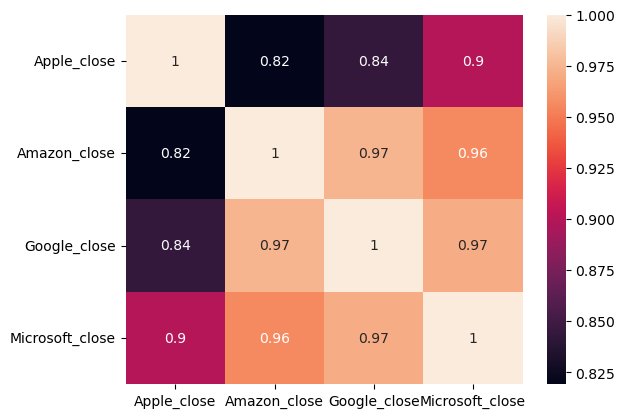

In [154]:
sns.heatmap(closing_prices.corr(),annot=True)

## Let's check if daily closing price change of the companies are correlated or not

In [155]:
amazon_data['Daily Price Change (in %)']=amazon_data['close'].pct_change()*100
google_data['Daily Price Change (in %)']=google_data['close'].pct_change()*100
microsoft_data['Daily Price Change (in %)']=microsoft_data['close'].pct_change()*100

In [156]:
closing_prices_pct_change=pd.concat([apple_data['Daily Price Change (in %)'],amazon_data['Daily Price Change (in %)'],google_data['Daily Price Change (in %)'],microsoft_data['Daily Price Change (in %)']],axis=1,keys=['Apple_close_pct_change','Amazon_close_pct_change','Google_close_pct_change','Microsoft_close_pct_change'])

In [157]:
closing_prices_pct_change

,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,-0.375625,1.125227
2,-2.506658,0.579293,-0.219841,0.071788
3,-0.190297,4.163123,0.276680,0.538020
4,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,-0.053290,-0.789391
1255,-4.339015,2.874101,-5.280173,-2.631021
1256,-2.498442,-2.793804,-5.075947,-4.118544
1257,4.179181,3.801439,2.074568,3.784091


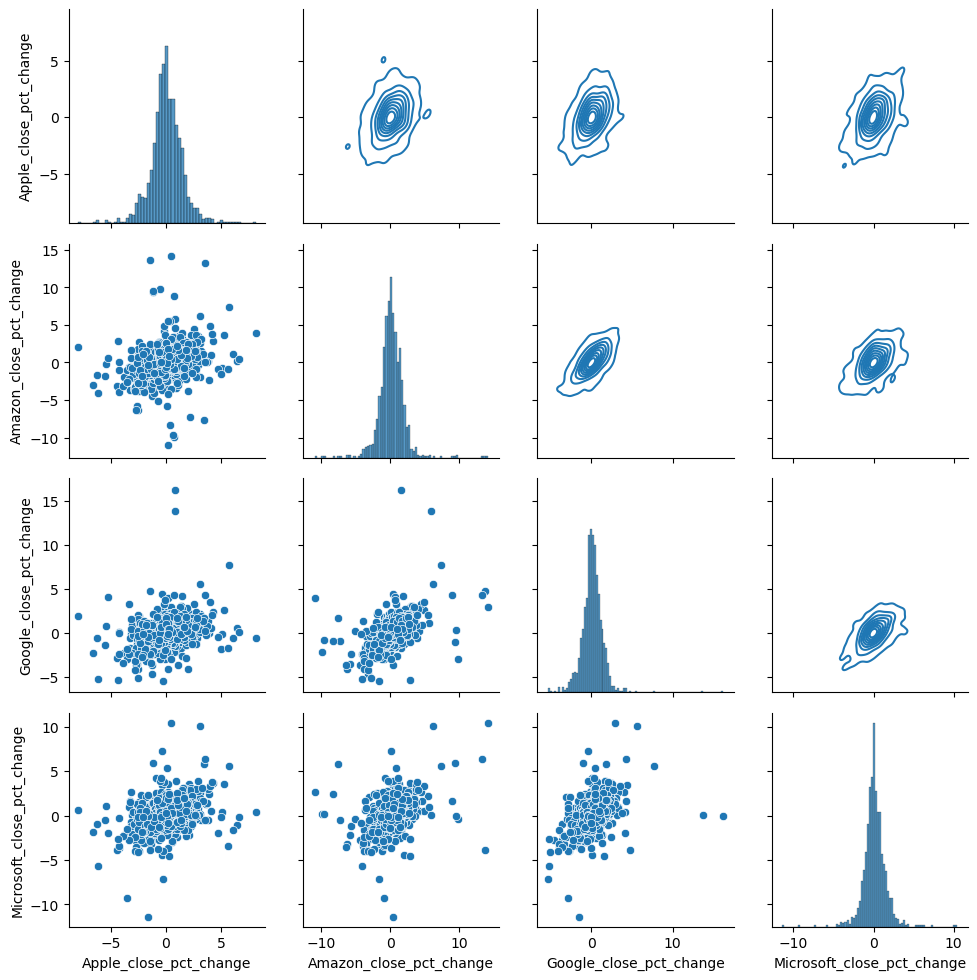

In [158]:
g=sns.PairGrid(data=closing_prices_pct_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [159]:
closing_prices_pct_change.corr()

,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
Apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
Amazon_close_pct_change,0.287659,1.000000,0.548423,0.402678
Google_close_pct_change,0.348858,0.548423,1.000000,0.488373
Microsoft_close_pct_change,0.366598,0.402678,0.488373,1.000000


##### From this we understand that when Amazon stock prices change there is 40 % chance that Microsoft stock prices change and 54 % chance that Google stock prices change.
##### When Google Stock prices change there is 48 % chance that Microsoft stock prices change